In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import random

## Generating dataset

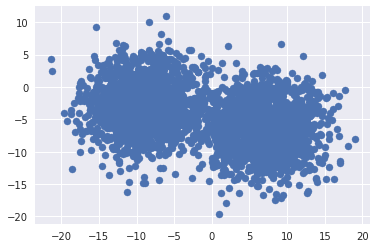

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=3000, centers=2,
                       cluster_std=3.80, random_state=15)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Kmeans class

In [13]:
class KMeans:
    def __init__(self, clusters=2, 
               n_iter=10):
        
        self.clusters = clusters
        self.n_iter = n_iter
    
    def cost(self, X, centroid_points):
        cost = 0.0
        
        for centroid_index, points_indexes in centroid_points.iteritems():
            for point_index in points_indexes:
                cost += self.distance(X[point_index], self.centroids[centroid_index])
    
        return cost/len(X)
    
    def generate_centroid(self, X, 
                          initial=False, 
                          centroid_points=None):
        
        new_centroids = []
        dim = X.shape[1]
        
        if initial:
            min_random = []
            max_random = []

            for i in range(dim):
                min_random.append(min(X[:, i]))
                max_random.append(max(X[:, i]))

            for i in range(self.clusters):
                centroid = []

                for i in range(dim):
                    centroid.append(random.uniform(min_random[i], max_random[i]))

                new_centroids.append(centroid)
        else:
            
            for centroid, points_indexes in centroid_points.iteritems():
                points = np.array([point for index, point in enumerate(X) if index in points_indexes])
                new_centroids.append(points.mean(axis=0))

        return new_centroids
    
    def distance(self, point_1, point_2):
        dist = 0.0
        for p1, p2 in zip(point_1, point_2):
            dist += (p2 - p1) ** 2
            
        return np.sqrt(dist)
    
    def split_points(self, centroids, X):
        centroid_points = dict()
        for i, _ in enumerate(centroids):
            centroid_points[i] = []
            
        for index, point in enumerate(X):
            distances = []
            
            for centroid in centroids:
                distances.append(self.distance(point, centroid))
                
            centroid_index = distances.index(min(distances))
            centroid_points[centroid_index].append(index)
        
        return centroid_points
            
    
    def fit(self, X):
        self.centroids = self.generate_centroid(X, initial=True)
        
        for i in range(self.n_iter):
            centroid_points = self.split_points(self.centroids, X)
            cost = self.cost(X, centroid_points)
            print(cost)
            self.centroids = self.generate_centroid(X, centroid_points=centroid_points)
            
    def predict(self, X):
        distances = []   
        for centroid in self.centroids:
            distances.append(self.distance(X, centroid))

        return distances.index(min(distances))

## Training and predicting

In [14]:
kmeans = KMeans()
kmeans.fit(X)
y_kmeans = [kmeans.predict(x) for x in X]

14.1736433706
6.32206625746
4.89784048928
4.73629206947
4.7296084453
4.72945984534
4.72945984534
4.72945984534
4.72945984534
4.72945984534


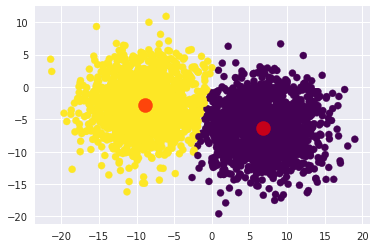

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = np.array(kmeans.centroids)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7);